In [28]:
# Topic Modeling (Latent Dirichlet Allocation - LDA)
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer to process text and extract features
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Transcription'])

# Apply LDA for topic modeling (number of topics you want to extract)
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display the top words for each topic
def display_topics(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()

# Get the top words for each topic
display_topics(lda, vectorizer.get_feature_names_out())


Topic #1:
ukraine president trump deferential zukunft zelensky billion energie deal war

Topic #2:
going ukraine disarm gaza people war russia israel trump think

Topic #3:
die und der das es ist wir zu auch dass

Topic #4:
die und das wir der ist nicht es auch den

Topic #5:
die und der das es ist nicht den hat ich



In [ ]:
# Text Similarity Analysis
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Transcription'])

# Calculate cosine similarity between the transcriptions
cosine_similarities = cosine_similarity(X)

# Convert cosine similarity matrix into a DataFrame for better visualization
cosine_df = pd.DataFrame(cosine_similarities, columns=df['Video_Name'], index=df['Video_Name'])

# Display cosine similarity between the first few transcriptions
print(cosine_df.head())


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/psylviana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


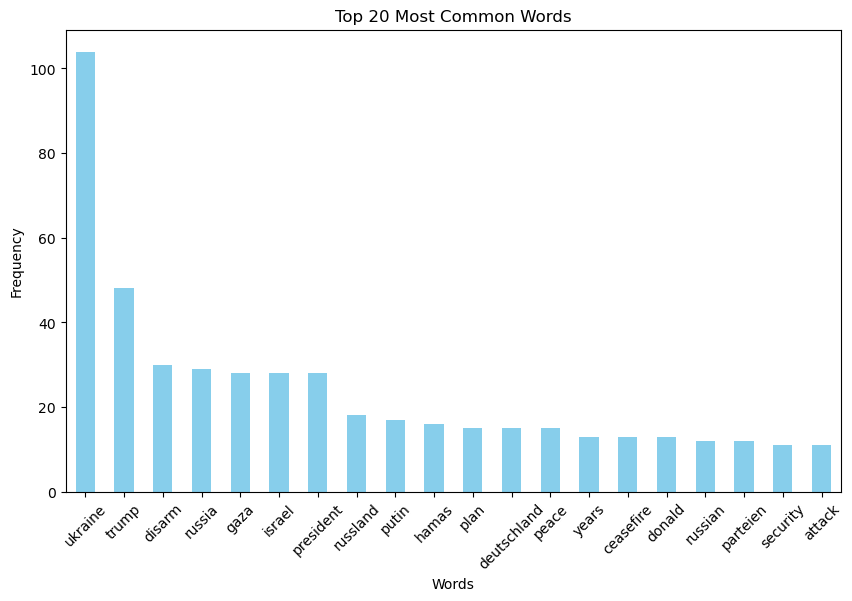

In [26]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# NLTK stopwords herunterladen
nltk.download('stopwords')
from nltk.corpus import stopwords

# Holen der deutschen und englischen Stopwörter
stop_words_german = stopwords.words('german')
stop_words_english = stopwords.words('english')

# Kombiniere beide Listen (Deutsch + Englisch)
stop_words_combined = stop_words_german + stop_words_english

# Zusätzliche manuelle Stopwörter, die du hinzufügen möchtest
additional_stopwords = ['ich', 'du', 'das', 'für', 'mit', 'an', 'und', 'auf', 'es', 'war', 'ja', 'viele', 'ganz', 'us', 'mehr',
                        'going', 'deal', 'people', 'sagen', 'deal', 'think', 'said', 'immer', 'say', 'menschen', 'gerade', 'one',
                        'see', 'schon', 'gibt', 'since']

# Füge die manuellen Stopwörter zur kombinierten Liste hinzu
stop_words_combined.extend(additional_stopwords)

# Initialisiere CountVectorizer mit der kombinierten Stopwörter-Liste
vectorizer = CountVectorizer(stop_words=stop_words_combined, max_features=20)

# Verwende deine Transkriptionen aus der DataFrame (ersetze 'Transcription' durch den tatsächlichen Spaltennamen)
X = vectorizer.fit_transform(df['Transcription'])

# Visualisieren der häufigsten Wörter
word_count = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_frequency = word_count.sum(axis=0).sort_values(ascending=False)

# Plot der häufigsten Wörter
plt.figure(figsize=(10, 6))
word_frequency.head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


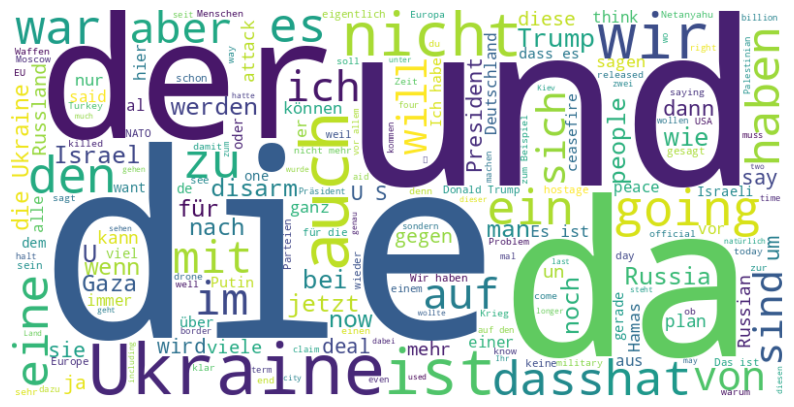

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all transcriptions into one large string
all_text = " ".join(df['Transcription'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [4]:
from transformers import pipeline

# Load pre-trained sentiment-analysis model
sentiment_model = pipeline("sentiment-analysis")

# Function to split text into chunks of 512 tokens or characters
def chunk_text(text, chunk_size=512):
    # Split text into chunks of a specified size (here, 512 characters)
    return [text[i:i+chunk_size] for i in range(0, len(text), chunk_size)]

# Function to get sentiment for each transcription (handling long texts)
def get_sentiment(text):
    # Split text into chunks
    chunks = chunk_text(text)
    
    sentiments = []
    for chunk in chunks:
        result = sentiment_model(chunk)
        sentiments.append(result[0]['label'])  # Get sentiment of each chunk
    
    # Optionally, take majority sentiment or average sentiment from chunks
    if sentiments.count('POSITIVE') > sentiments.count('NEGATIVE'):
        return 'POSITIVE'
    else:
        return 'NEGATIVE'

# Apply sentiment analysis to each transcription
df['Sentiment'] = df['Transcription'].apply(get_sentiment)

# Check the result
print(df[['Video_Name', 'Sentiment']].head())


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


                     Video_Name Sentiment
0  RPReplay_Final1741876051.txt  NEGATIVE
1  RPReplay_Final1741874972.txt  NEGATIVE
2  RPReplay_Final1741874207.txt  POSITIVE
3  RPReplay_Final1741875050.txt  NEGATIVE
4  RPReplay_Final1741876170.txt  NEGATIVE


In [3]:
from transformers import pipeline

# Load pre-trained sentiment-analysis model
sentiment_model = pipeline("sentiment-analysis")

# Function to get sentiment for each transcription
def get_sentiment(text):
    # Truncate text to 512 tokens
    truncated_text = text[:512]  # Limit to the first 512 characters (not tokens)
    
    result = sentiment_model(truncated_text)
    return result[0]['label']  # 'LABEL_0' for negative, 'LABEL_1' for positive (depending on the model)

# Apply sentiment analysis to each transcription
df['Sentiment'] = df['Transcription'].apply(get_sentiment)

# Check the result
print(df[['Video_Name', 'Sentiment']].head())


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


                     Video_Name Sentiment
0  RPReplay_Final1741876051.txt  NEGATIVE
1  RPReplay_Final1741874972.txt  NEGATIVE
2  RPReplay_Final1741874207.txt  POSITIVE
3  RPReplay_Final1741875050.txt  NEGATIVE
4  RPReplay_Final1741876170.txt  NEGATIVE


In [1]:
import os
import pandas as pd

# Path to the folder where your .txt files are stored
text_folder = '/Users/psylviana/Downloads/VideoAnalyse/EXTRACTED_AUDIO'

# List to hold all transcription data
transcriptions = []
broadcasters = []  # If you want to track which broadcaster the transcription belongs to
video_names = []  # If you want to track the video name as well

# Loop through each folder (e.g., ZDF, ARD, etc.)
for broadcaster in os.listdir(text_folder):
    broadcaster_path = os.path.join(text_folder, broadcaster)
    
    if not os.path.isdir(broadcaster_path):
        continue  # Skip if not a folder
    
    for transcription_file in os.listdir(broadcaster_path):
        if transcription_file.lower().endswith('.txt'):
            transcription_path = os.path.join(broadcaster_path, transcription_file)
            
            # Read the .txt file
            with open(transcription_path, 'r', encoding='utf-8') as file:
                transcription_text = file.read()
            
            # Append data to the lists
            transcriptions.append(transcription_text)
            broadcasters.append(broadcaster)
            video_names.append(transcription_file)

# Create a DataFrame from the list
df = pd.DataFrame({
    'Broadcaster': broadcasters,
    'Video_Name': video_names,
    'Transcription': transcriptions
})

# Check the first few rows of the DataFrame to verify
print(df.head())


  Broadcaster                    Video_Name  \
0         WDR  RPReplay_Final1741876051.txt   
1         WDR  RPReplay_Final1741874972.txt   
2         WDR  RPReplay_Final1741874207.txt   
3         WDR  RPReplay_Final1741875050.txt   
4         WDR  RPReplay_Final1741876170.txt   

                                       Transcription  
0   da nicht verdienen und Russland auf den Krieg...  
1   Die Union hat ja immer wieder gesagt, wir hät...  
2                                        you you you  
3   Er leidet, hat jedes Hälfte zu. Da gibt es in...  
4   In Deutschland wurde ja darüber übergeredet, ...  
